! mkdir ~/.kaggle

In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


! cp kaggle.json ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
import tensorflow as tf 
from tensorflow import keras
import kaggle 
 
import numpy as np 
import cv2
import matplotlib.pyplot as plt


In [11]:
!kaggle datasets download -d tongpython/cat-and-dog

 95% 206M/218M [00:01<00:00, 108MB/s]
100% 218M/218M [00:01<00:00, 133MB/s]


In [12]:
import os
import zipfile

local_zip = '/content/cat-and-dog.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/cat-and-dog')
zip_ref.close()

In [13]:
% ls

cat-and-dog/  cat-and-dog.zip  kaggle.json  sample_data/


In [18]:
# Directory with our training cats pictures
train_cat_dir = os.path.join('/content/cat-and-dog/training_set/training_set/cats')

# Directory with our training dogs pictures
train_dog_dir = os.path.join('/content/cat-and-dog/training_set/training_set/dogs')

In [19]:
train_cat_dir_names = os.listdir(train_cat_dir)
print(train_cat_dir_names[:10])

train_dog_dir_names = os.listdir(train_dog_dir)
print(train_dog_dir_names[:10])

['cat.477.jpg', 'cat.2982.jpg', 'cat.2744.jpg', 'cat.2273.jpg', 'cat.3264.jpg', 'cat.3310.jpg', 'cat.2316.jpg', 'cat.2705.jpg', 'cat.759.jpg', 'cat.2876.jpg']
['dog.2737.jpg', 'dog.1508.jpg', 'dog.848.jpg', 'dog.90.jpg', 'dog.3673.jpg', 'dog.2858.jpg', 'dog.3293.jpg', 'dog.662.jpg', 'dog.2403.jpg', 'dog.164.jpg']


In [20]:
print('total training cats images:', len(os.listdir(train_cat_dir)))
print('total training dogs images:', len(os.listdir(train_dog_dir)))

total training cats images: 4001
total training dogs images: 4006


In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

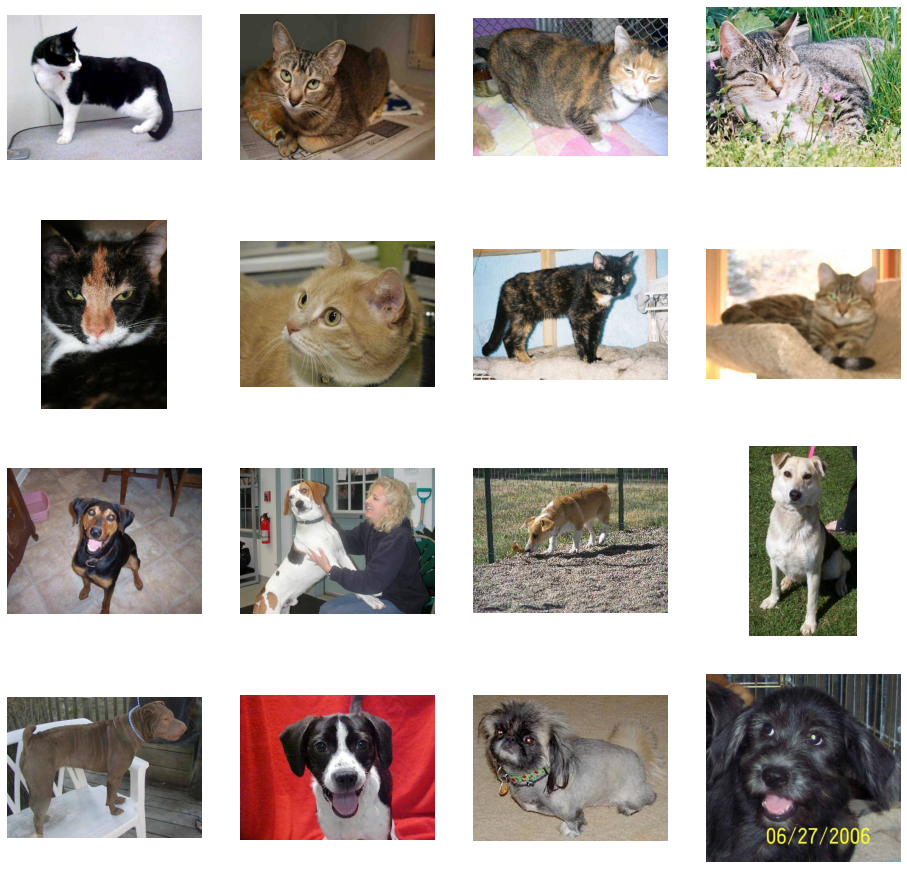

In [22]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_dir_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_dir_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [23]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/cat-and-dog/training_set/training_set/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 8005 images belonging to 2 classes.


train for 40 epochs 

In [28]:

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      verbose=1)

Epoch 1/25
8/8 [==============================] - 4s 416ms/step - loss: 0.6071 - accuracy: 0.6709
Epoch 2/25
8/8 [==============================] - 4s 421ms/step - loss: 0.5722 - accuracy: 0.6787
Epoch 3/25
8/8 [==============================] - 3s 417ms/step - loss: 0.5950 - accuracy: 0.6846
Epoch 4/25
8/8 [==============================] - 4s 422ms/step - loss: 0.5859 - accuracy: 0.6787
Epoch 5/25
8/8 [==============================] - 4s 429ms/step - loss: 0.5702 - accuracy: 0.7080
Epoch 6/25
8/8 [==============================] - 4s 422ms/step - loss: 0.5478 - accuracy: 0.7109
Epoch 7/25
8/8 [==============================] - 4s 422ms/step - loss: 0.5430 - accuracy: 0.7168
Epoch 8/25
8/8 [==============================] - 3s 394ms/step - loss: 0.5809 - accuracy: 0.7036
Epoch 9/25
8/8 [==============================] - 3s 396ms/step - loss: 0.5089 - accuracy: 0.7554
Epoch 10/25
8/8 [==============================] - 4s 420ms/step - loss: 0.5316 - accuracy: 0.7217
Epoch 11/25
8/8 [==

test model here 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")